In [2]:
import numpy as np
import imageio
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile, join
import h5py

In [3]:
def readh5(filename, datasetname='main', rr=[1,1,1]):
    fid=h5py.File(filename,'r')
    if isinstance(datasetname, (list,)):
        out = [None] *len(datasetname)
        for i,dd in enumerate(datasetname):
            sz = len(fid[dd].shape)
            if sz==2:
                out[i] = np.array(fid[dd][::rr[0],::rr[1]])
            elif sz==3:
                out[i] = np.array(fid[dd][::rr[0],::rr[1],::rr[2]])
    else:
        sz = len(fid[datasetname].shape)
        if sz==2:
            out = np.array(fid[datasetname][::rr[0],::rr[1]])
        elif sz==3:
            out = np.array(fid[datasetname][::rr[0],::rr[1],::rr[2]])
    return out

def writeh5(filename, dtarray, datasetname='main'): 
    fid=h5py.File(filename,'w')                                                                      
    if isinstance(datasetname, (list,)):                                                             
        for i,dd in enumerate(datasetname):                                                          
            ds = fid.create_dataset(dd, dtarray[i].shape, compression="gzip", dtype=dtarray[i].dtype)
            ds[:] = dtarray[i]                                                                       
    else:                                                                                            
        ds = fid.create_dataset(datasetname, dtarray.shape, compression="gzip", dtype=dtarray.dtype) 
        ds[:] = dtarray                                                                              
    fid.close()
    
def squeezeto255(dtarray):
    """
    To process Dyer17's dataset.
    Given a volume, scale all the voxels into the range of (0, 255).
    """
    volume_min = np.min(dtarray)
    # First make all voxel positive, then make the range into (0, 255) 
    volume = -1.0 * volume_min + dtarray
    volume_max = np.max(volume)
    volume = (255.0 / volume_max) * volume
    return volume
    
def combine_png(directory="im_yz_clahe"):
    """
    volume.shape = 1936, 1992, 1942
    """

    onlyfiles = np.sort([f for f in listdir(directory) if isfile(join(directory, f))])

    volume = None

    for i in range(len(onlyfiles)):
        if i % 100 == 0:
            print(i)
        im = imageio.imread(join(directory, onlyfiles[i]))
        im = np.expand_dims(im, axis=0)
        if volume is None:
            volume = im
        else:
            volume = np.concatenate([volume, im], axis=0)
            
    return volume
    

In [4]:
# z0,z1,x0,x1,y0,y1
bounding_box1 = [446,637,954,1553,102,779]
bounding_box0 = [689,713,1220,1305,163,364]

In [30]:
volume = None

for i in range(bounding_box0[0], bounding_box0[1]):
    im=imageio.imread("vol_pyr/_s%04d.png"%(i))
    im = np.expand_dims(im, axis=0)
    if volume is None:
        volume = im
    else:
        volume = np.concatenate([volume, im], axis=0)

In [56]:
nagCT_V1_Train = readh5("nagCT_V1_Train.h5")
nagCT_V1_Label = readh5("nagCT_V1_Label_corrected.h5")
nagCT_V0_Label = readh5("nagCT_V0_Label_corrected.h5")
nagCT_V0_Train = readh5("nagCT_V0_Train.h5")

In [57]:
nagCT_V1_Label_Corrected = (nagCT_V1_Label != 0).astype(int) # cell has label 1, background has label 0.
nagCT_V0_Label_Corrected = (nagCT_V0_Label != 0).astype(int) # cell has label 1, background has label 0.

In [61]:
nagCT_V1_Train.shape

(191, 600, 678)

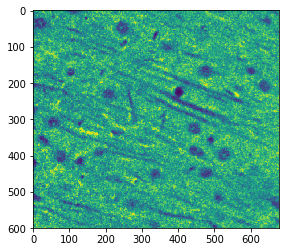

In [60]:
plt.imshow(nagCT_V1_Train[100])

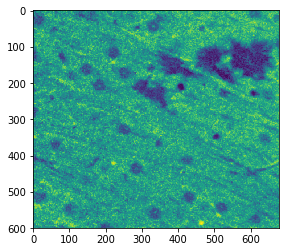

In [48]:
plt.imshow(nagCT_V1_Train[50])

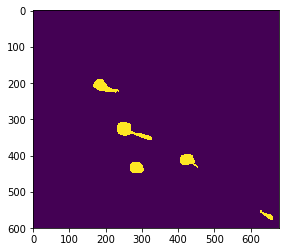

In [49]:
plt.imshow(nagCT_V0_Label_Corrected[50])

In [59]:
np.unique(nagCT_V0_Label_Corrected)

array([0, 1])

In [23]:
writeh5("nagCT_V1_Train.h5", volume[446:637,954:1553+1,102:779+1])

In [24]:
writeh5("nagCT_V0_Train.h5", volume[689:713,1220:1305+1,163:364+1])

In [27]:
writeh5("nagCT_V1_Label.h5", volume[:,954:1553+1,102:779+1])

In [32]:
writeh5("nagCT_V0_Label.h5", volume[:,1220:1305+1,163:364+1])

In [64]:
writeh5("nagCT_V1_Label_corrected.h5", nagCT_V1_Label_Corrected)

In [65]:
writeh5("nagCT_V0_Label_corrected.h5", nagCT_V0_Label_Corrected)